In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [3]:
# Pick some number of evenly spaced points N
N = 1000
Psi = np.zeros(N)

# Set gamma squared to some value, physical params contained in this
GammaSquare = 200

# Define the dimensionless potential
def nu(xtilde):
    return -1

# Pick some trial dimensionless energy, nrg, which must be greater
# than the minimum of the dimensionless potential, nu
# (see Griffiths Quantum mechanics Problem 2.2)
nrg = -0.9

# Set array of dimensionless x values
xtilde_vals = np.linspace(0, 1, N)

In [4]:
# Define iterative method for solving the Schrodinger equation
def iterative_method(Psi_, k_squared_vals_, N_):
    l_squared = (1/N)**2
    p_vals, q_vals = 1 - (5/12) * l_squared * k_squared_vals_, 1 + (1/12) * l_squared * k_squared_vals_
    for i in range(2, N_):
        Psi_[i] = (2*p_vals[i-1]*Psi_[i-1] - q_vals[i-2]*Psi_[i-2])/q_vals[i]
    return Psi_

In [5]:
def analysis(Psi_, nrg_, nu_, xtilde_vals_, N_, GammaSquare_):

    # Set the dimensionless energy array so that calculation is easier.
    nrg_vals = nrg_*np.ones(N_)

    # Calculate the potential and k squared values from the inputted potential.
    # points and energy.
    potential_vals = [nu_(x) for x in xtilde_vals_]
    k_squared_vals = GammaSquare_ * (nrg_vals - potential_vals)

    # For nu=-1, first two points given by
    Psi_[0], Psi_[1] = 0, 1E-4

    # Calculate the wavefunction from these points.
    Psi_ = iterative_method(Psi_, k_squared_vals, N_)

    fig, ax = plt.subplots()
    fig.suptitle('Numerical Solution to the Schrodinger Equation')

    ax.grid(alpha=0.6)
    ax.plot(xtilde_vals_, Psi_, label='Numerical Solution')
    ax.set_xlabel('$x/L$')
    ax.set_ylabel('$\psi(x/L)$')

    plt.show()
    plt.close()

# analysis(Psi, nrg, nu, xtilde_vals, N, GammaSquare)


def analysis_no_plot(Psi_, nrg_, nu_, xtilde_vals_, N_, GammaSquare_):

    # Set the dimensionless energy array so that calculation is easier.
    nrg_vals = nrg_*np.ones(N_)

    # Calculate the potential and k squared values from the inputted potential.
    # points and energy.
    potential_vals = [nu_(x) for x in xtilde_vals_]
    k_squared_vals = GammaSquare_ * (nrg_vals - potential_vals)

    # For nu=-1, first two points given by
    Psi_[0], Psi_[1] = 0, 1E-4

    # Calculate the wavefunction from these points.
    Psi_ = iterative_method(Psi_, k_squared_vals, N_)
    return Psi_

<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_4302/2732459611.py:23: SyntaxWarning: invalid escape sequence '\p'
  ax.set_ylabel('$\psi(x/L)$')


In [6]:
def Shooting_method(nrg_, nu_, xtilde_vals_, N_, GammaSquare_):
        dnrg = 1E-4
        tolerance = 1E-16

        Psi_ = np.zeros(N_)
        Psi_ = analysis_no_plot(Psi_, nrg_, nu_, xtilde_vals_, N_, GammaSquare_)
        Psi_end_vals = [Psi_[-1]]

        while dnrg > tolerance:
            nrg_ += dnrg
            Psi_prime = analysis_no_plot(Psi_, nrg_, nu_, xtilde_vals_, N_, GammaSquare_)
            Psi_end_vals.append(Psi_prime[-1])
            if Psi_end_vals[-1]*Psi_end_vals[-2] < 0:
                dnrg = -dnrg/2
        return nrg_

In [7]:
energy = Shooting_method(nrg, nu, xtilde_vals, N, GammaSquare)
print(energy)

energy_starting_values = [-0.99, -0.9, -0.6, -0.3, 0.2, 0.5, 1, 2, 2.8, 3.8]


# energy_starting_values = np.linspace(-0.99, 5, 40)
energy_final_values = np.zeros(10)
for i in range(len(energy_starting_values)):
    energy_final_values[i] = Shooting_method(energy_starting_values[i], nu, xtilde_vals, N, GammaSquare)
    print(f'Iteration {i} complete')

print(energy_final_values)

-0.8022000000000108
Iteration 0 complete
Iteration 1 complete
Iteration 2 complete
Iteration 3 complete
Iteration 4 complete
Iteration 5 complete
Iteration 6 complete
Iteration 7 complete
Iteration 8 complete
Iteration 9 complete
[-0.9505 -0.8022 -0.5549 -0.2088  0.2362  0.7801  1.4229  2.1646  3.0052
  3.9447]


In [8]:
analytic_energies = [[],[]]
for n in range(10):
    analytic_energies[0].append(((n + 1)**2 * np.pi**2 / GammaSquare) - 1)
    analytic_energies[1].append(n + 1)

# for a in energy_final_values:
#     if a == 0.: energy_final_values = energy_final_values[energy_final_values!=a]
#     if a > 4:   energy_final_values = energy_final_values[energy_final_values!=a]
#     for b in energy_final_values[energy_final_values!=a]:
#         if np.isclose(a, b, atol=1E-1):
#                 energy_final_values = energy_final_values[energy_final_values!=a]

print('',energy_final_values, '\n',np.array(analytic_energies))
        

 [-0.9505 -0.8022 -0.5549 -0.2088  0.2362  0.7801  1.4229  2.1646  3.0052
  3.9447] 
 [[-0.95065198 -0.80260791 -0.5558678  -0.21043165  0.23370055  0.77652879
   1.41805308  2.15827341  2.99718978  3.9348022 ]
 [ 1.          2.          3.          4.          5.          6.
   7.          8.          9.         10.        ]]


<>:51: SyntaxWarning: invalid escape sequence '\p'
<>:51: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_4302/1579748069.py:51: SyntaxWarning: invalid escape sequence '\p'
  axs.set_ylabel('$\psi(x/L)$')


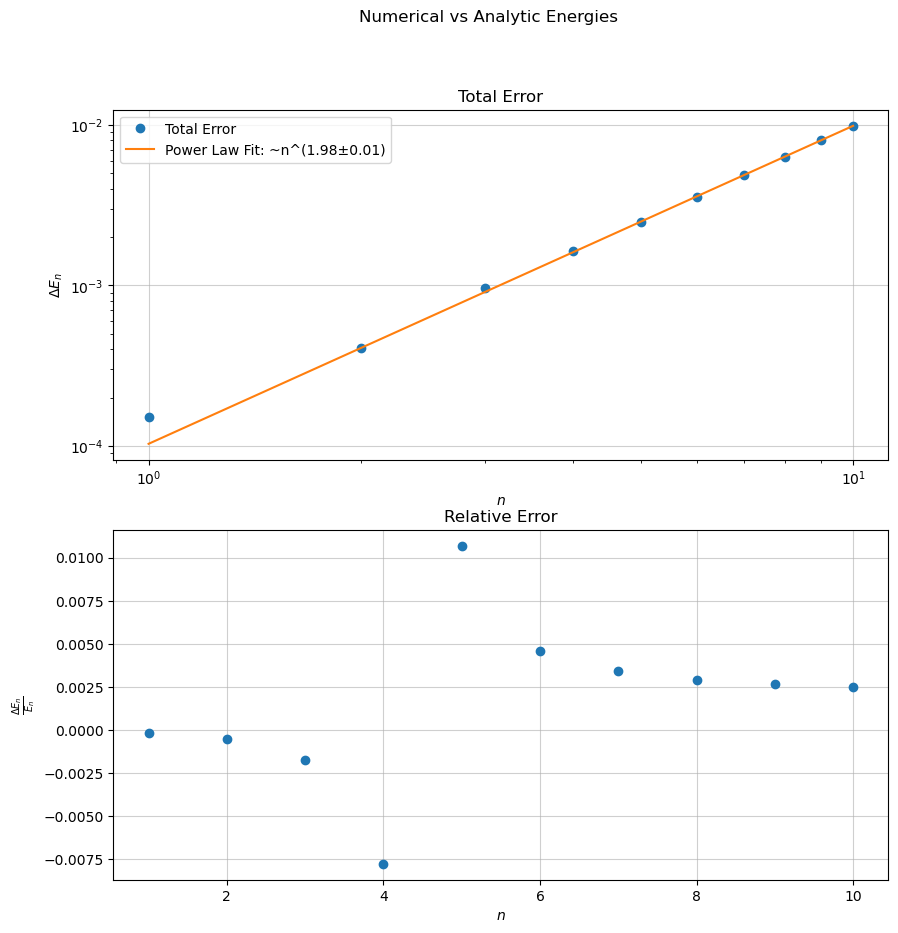

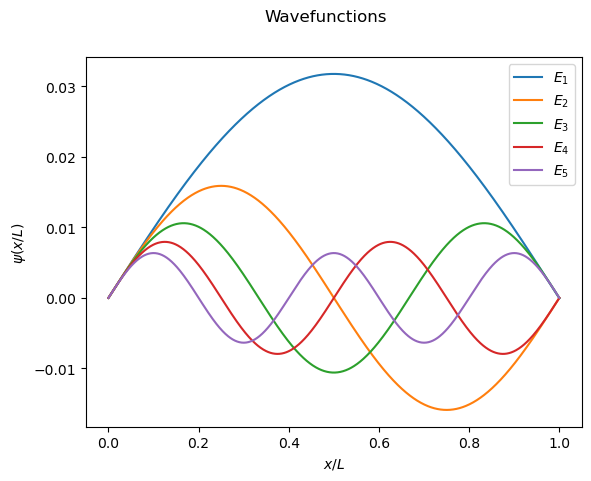

In [9]:
# Error of numerical energies

from scipy.optimize import curve_fit

total_error = energy_final_values - analytic_energies[0]
relative_error = np.abs(total_error)/analytic_energies[0]

def power_law(x, a, b):
    return a*x**b

def error_analysis(analytic_energies_, total_error_, relative_error_, fit_func):

    params, covariance = curve_fit(fit_func, analytic_energies_[1], total_error_)
    sigma = np.sqrt(np.diag(covariance))
    x_points = np.linspace(1, 10, 100)


    fig, axs = plt.subplots(2, 1, figsize=(10, 10))
    fig.suptitle('Numerical vs Analytic Energies')

    axs[0].set_title('Total Error')
    axs[0].grid(alpha=0.6)
    axs[0].plot(analytic_energies_[1], total_error_, 'o', label='Total Error')
    axs[0].plot(x_points, power_law(x_points, *params), label=f'Power Law Fit: ~n^({params[1]:.2f}±{sigma[1]:.2f})')
    axs[0].set_xlabel('$n$')
    axs[0].set_ylabel('$\\Delta E_n$')
    axs[0].legend()
    axs[0].set_yscale('log')
    axs[0].set_xscale('log')

    axs[1].set_title('Relative Error')
    axs[1].set_xlabel('$n$')
    axs[1].set_ylabel('$\\frac{\\Delta E_n}{E_n}$')
    axs[1].grid(alpha=0.6)
    axs[1].plot(analytic_energies_[1], relative_error_, 'o', label='Relative Error') 

    plt.show()
    plt.close()

error_analysis(analytic_energies, total_error, relative_error, power_law)

def plot_wavefunctions(energy_final_values_, nu_, xtilde_vals_, N_, GammaSquare_):
    fig, axs = plt.subplots()
    fig.suptitle('Wavefunctions')

    for i in range(int(len(energy_final_values)/2)):
        Psi = np.zeros(N)
        Psi = analysis_no_plot(Psi, energy_final_values_[i], nu_, xtilde_vals_, N_, GammaSquare_)
        axs.plot(xtilde_vals_, Psi, label=f'$E_{i+1}$')
    axs.set_xlabel('$x/L$')
    axs.set_ylabel('$\psi(x/L)$')
    axs.legend()
    plt.show()
    plt.close()

plot_wavefunctions(energy_final_values, nu, xtilde_vals, N, GammaSquare)
    

<>:30: SyntaxWarning: invalid escape sequence '\p'
<>:30: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_4302/1343573663.py:30: SyntaxWarning: invalid escape sequence '\p'
  axs.set_ylabel('$\psi(x/L)$')


Integral of Psi^2: 0.0005042762548151322
Normalisation succesful for $E_1$
Integral of Psi^2: 0.0001262615670756199
Normalisation succesful for $E_2$
Integral of Psi^2: 5.610772165506516e-05
Normalisation succesful for $E_3$
Integral of Psi^2: 3.156664052500163e-05
Normalisation succesful for $E_4$
Integral of Psi^2: 2.0204475033491467e-05
Normalisation succesful for $E_5$


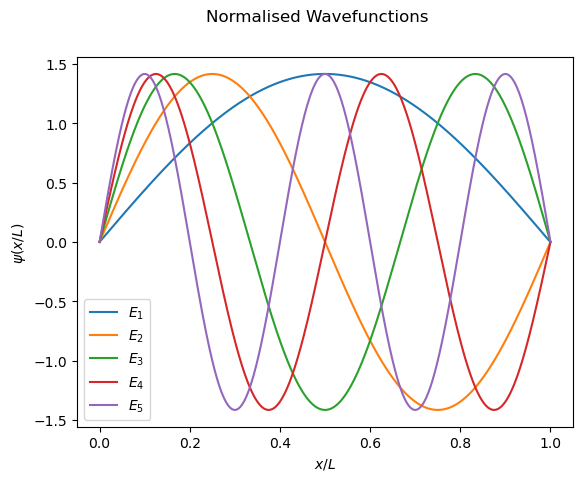

In [10]:
# Normalisation


def normalised_wavefunction(Psi_, N_):
    if np.isclose(simps(Psi_**2, dx=1/N_), 1, atol=1E-2):
        print('Already normalised')
    else:
        Int_of_Psi_square = simps(Psi_**2, dx=1/N_)
        print('Integral of Psi^2:', Int_of_Psi_square)
        return Psi_/(Int_of_Psi_square**0.5)

def plot_normalised_wavefunctions(energy_final_values_, nu_, xtilde_vals_, N_, GammaSquare_):
    fig, axs = plt.subplots()
    fig.suptitle('Normalised Wavefunctions')

    for i in range(int(len(energy_final_values)/2)):
        Psi = np.zeros(N)
        Psi = analysis_no_plot(Psi, energy_final_values_[i], nu_, xtilde_vals_, N_, GammaSquare_)
        normal_Psi = normalised_wavefunction(Psi, N_)
        axs.plot(xtilde_vals_, normal_Psi, label=f'$E_{i+1}$')
    
        # Check normalisation
        
        if np.isclose(simps(normal_Psi**2, dx=1/N), 1, atol=1E-4):
            print(f'Normalisation succesful for $E_{i+1}$')
        else:
            print(f'Normalisation failed for $E_{i+1}$')

    axs.set_xlabel('$x/L$')
    axs.set_ylabel('$\psi(x/L)$')
    axs.legend()
    plt.show()
    plt.close()

plot_normalised_wavefunctions(energy_final_values, nu, xtilde_vals, N, GammaSquare)



Integral of Psi^2: 0.0005042762548151322
 Uncertainty in x: 0.18005584974611416 
 Uncertainty in p: (3.1464925865726157+0j) 
 Uncertainty principle: (0.5665443963951811+0j) ≳ 0.5
Integral of Psi^2: 0.0005042762548151322
Uncertainty principle not satisfied for E_-0.9505000000000043
Integral of Psi^2: 0.0001262615670756199
Uncertainty principle not satisfied for E_-0.8022000000000108
Integral of Psi^2: 5.610772165506516e-05
Uncertainty principle not satisfied for E_-0.554900000000005
Integral of Psi^2: 3.156664052500163e-05
Uncertainty principle not satisfied for E_-0.20880000000001003
Integral of Psi^2: 2.0204475033491467e-05
Uncertainty principle not satisfied for E_0.23619999999999602
Integral of Psi^2: 1.4031725274697128e-05
Uncertainty principle not satisfied for E_0.7800999999999692
Integral of Psi^2: 1.0309553088584601e-05
Uncertainty principle not satisfied for E_1.4228999999999534
Integral of Psi^2: 7.893657166897528e-06
Uncertainty principle not satisfied for E_2.16460000000034

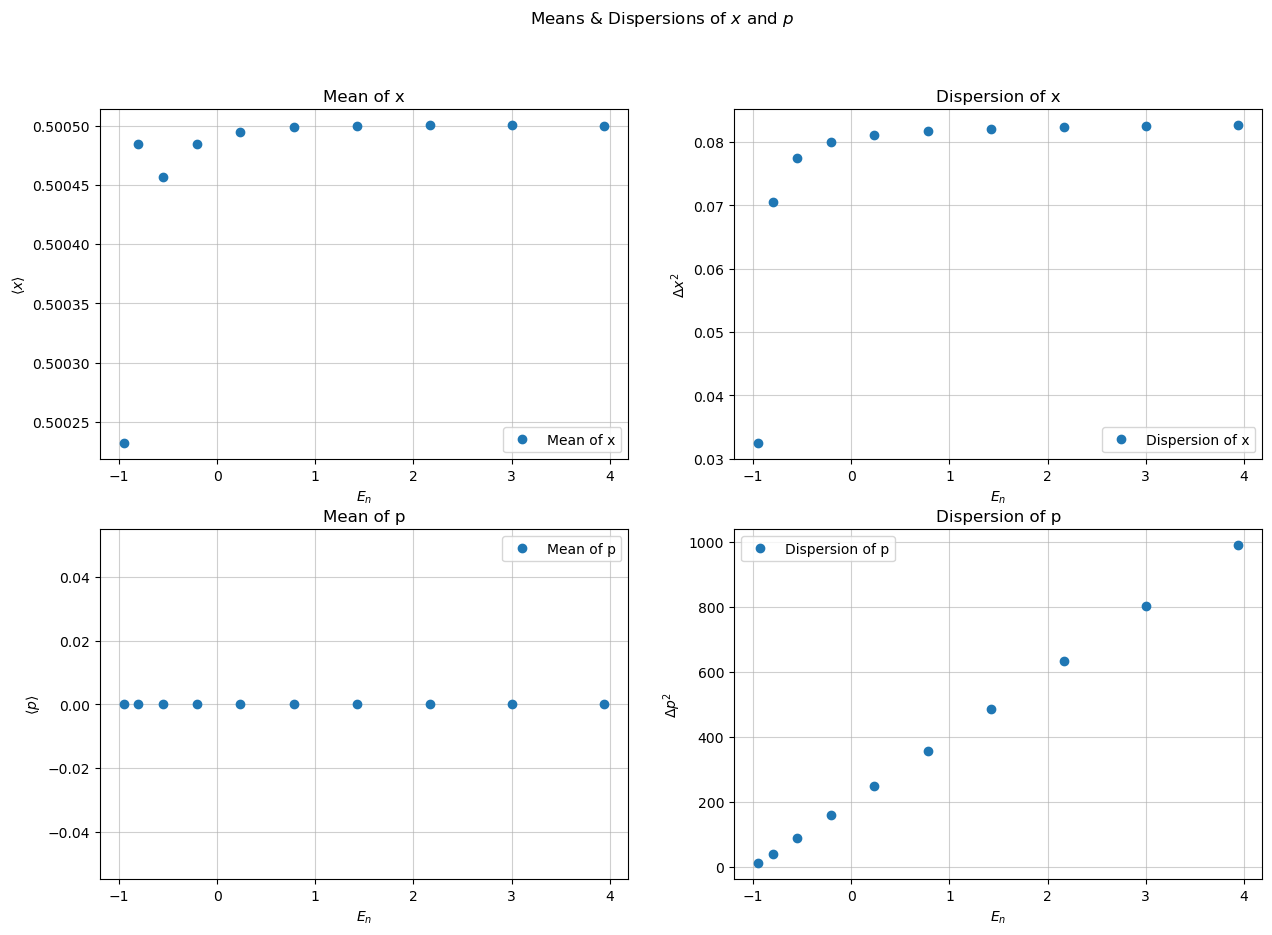

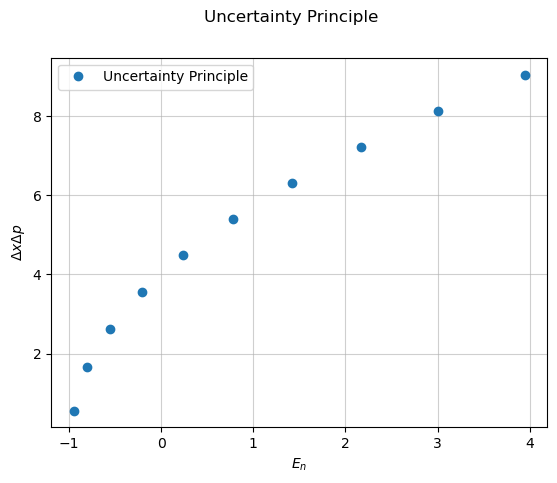

[0.5665444  1.6700099  2.62716167 3.55816632 4.47932832 5.39569012
 6.30934286 7.22131419 8.13216912 9.04224434]


In [19]:
# Uncertainty
Psi = np.zeros(N)
Psi = analysis_no_plot(Psi, energy_final_values[0], nu, xtilde_vals, N, GammaSquare)
Psi = normalised_wavefunction(Psi, N)

def expectation_value_moment(Psi_, xtilde_vals_, N_, n):
    return simps((Psi_ **2) * (xtilde_vals_**n), xtilde_vals_, dx=1/N_)


def dispersion_x(Psi_, xtilde_vals_, N_):
    return expectation_value_moment(Psi_, xtilde_vals_, N_, 2) - expectation_value_moment(Psi_, xtilde_vals_, N_, 1)**2


def five_point_central_difference_method(Psi_, N_):
    dpsidx = np.zeros(N_)
    h = 1/N_
    dpsidx[0] = (Psi_[1] - Psi_[0])/h
    dpsidx[1] = (Psi_[2] - Psi_[0])/(2*h)
    for i in range(2, N_-3):
        dpsidx[i] = (8*Psi_[i+1] - 8*Psi_[i-1] - Psi_[i+2] + Psi_[i-2])/(12*h)
    dpsidx[-2] = (Psi_[-1] - Psi_[-3])/(2*h)
    dpsidx[-1] = (Psi_[-1] - Psi_[-2])/h
    return dpsidx


def expectation_value_p(Psi_, xtilde_vals_, N_):
    q = 0 - 1j
    dPsidx = five_point_central_difference_method(Psi_, N_)
    return q*simps(Psi_*dPsidx, xtilde_vals_, dx=1/N_)


def expectation_value_p_squared(Psi_, xtilde_vals_, N_):
    dPsidx = five_point_central_difference_method(Psi_, N_)
    d2Psidx2 = five_point_central_difference_method(dPsidx, N_)
    return -simps(Psi_*d2Psidx2, xtilde_vals_, dx=1/N_)

def dispersion_p(Psi_, xtilde_vals_, N_):
    return expectation_value_p_squared(Psi_, xtilde_vals_, N_) - expectation_value_p(Psi_, xtilde_vals_, N_)**2

# print(expectation_value_moment(Psi, xtilde_vals, N, 1))
# print(expectation_value_moment(Psi, xtilde_vals, N, 2))
# print(dispersion_x(Psi, xtilde_vals, N))
# print(expectation_value_p(Psi, xtilde_vals, N))
# print(expectation_value_p_squared(Psi, xtilde_vals, N))
# print(dispersion_p(Psi, xtilde_vals, N))

print(' Uncertainty in x:', np.sqrt(dispersion_x(Psi, xtilde_vals, N)), '\n',
      'Uncertainty in p:', np.sqrt(dispersion_p(Psi, xtilde_vals, N)), '\n',
      'Uncertainty principle:', np.sqrt(dispersion_x(Psi, xtilde_vals, N)*dispersion_p(Psi, xtilde_vals, N)), '≳', 0.5)

def uncertainty_principle_check_and_plot(energies, nu_, xtilde_vals_, N_, GammaSquare_):
    expec_p = np.zeros(len(energies))
    expec_p_squared = np.zeros(len(energies))
    disp_p = np.zeros(len(energies))
    expec_x = np.zeros(len(energies))
    expec_x_squared = np.zeros(len(energies))
    disp_x = np.zeros(len(energies))
    
    for i, energy in enumerate(energies):
        Psi = np.zeros(N_)
        Psi = analysis_no_plot(Psi, energy, nu, xtilde_vals, N, GammaSquare)
        Psi = normalised_wavefunction(Psi, N)

        expec_x[i] = expectation_value_moment(Psi, xtilde_vals, N, 1)
        expec_x_squared[i] = expectation_value_moment(Psi, xtilde_vals, N, 2)
        disp_x[i] = dispersion_x(Psi, xtilde_vals, N)
        if np.isclose(expectation_value_p(Psi, xtilde_vals, N), 0, atol=1E-2):
            expec_p[i] = 0
        else:
            expec_p[i] = expectation_value_p(Psi, xtilde_vals, N)
            print('Expectation value of p non-zero')
        expec_p_squared[i] = expectation_value_p_squared(Psi, xtilde_vals, N)
        disp_p[i] = dispersion_p(Psi, xtilde_vals, N).real

        uncertainty_principle = np.sqrt(disp_x*disp_p)
        
        if  uncertainty_principle[-1] >= 0.5:
            print(f'Uncertainty principle satisfied for E_{energy}')
        else:
            print(f'Uncertainty principle not satisfied for E_{energy}')

    # Means, Dispersions.
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Means & Dispersions of $x$ and $p$')

    axs[0,0].set_title('Mean of x')
    axs[0,0].grid(alpha=0.6)
    axs[0,0].plot(energies, expec_x, 'o', label='Mean of x')
    axs[0,0].set_xlabel('$E_n$')
    axs[0,0].set_ylabel('$\\langle x \\rangle$')
    axs[0,0].legend()

    axs[0,1].set_title('Dispersion of x')
    axs[0,1].grid(alpha=0.6)
    axs[0,1].plot(energies, disp_x, 'o', label='Dispersion of x')
    axs[0,1].set_xlabel('$E_n$')
    axs[0,1].set_ylabel('$\\Delta x^2$')
    axs[0,1].legend()

    axs[1,0].set_title('Mean of p')
    axs[1,0].grid(alpha=0.6)
    axs[1,0].plot(energies, expec_p, 'o', label='Mean of p')
    axs[1,0].set_xlabel('$E_n$')
    axs[1,0].set_ylabel('$\\langle p \\rangle$')
    axs[1,0].legend()

    axs[1,1].set_title('Dispersion of p')
    axs[1,1].grid(alpha=0.6)
    axs[1,1].plot(energies, disp_p, 'o', label='Dispersion of p')
    axs[1,1].set_xlabel('$E_n$')
    axs[1,1].set_ylabel('$\\Delta p^2$')
    axs[1,1].legend()

    plt.show()
    plt.close()


    # Uncertainty Principle.
    fig, axs = plt.subplots()
    fig.suptitle('Uncertainty Principle')

    axs.grid(alpha=0.6)
    axs.plot(energies, uncertainty_principle, 'o', label='Uncertainty Principle')
    axs.set_xlabel('$E_n$')
    axs.set_ylabel('$\\Delta x \\Delta p$')
    axs.legend()

    plt.show()
    plt.close()

    print(uncertainty_principle)



uncertainty_principle_check_and_plot(energy_final_values, nu, xtilde_vals, N, GammaSquare)




